## <span style="color:#2F749F;"><strong>📦 Sesión práctica 2: Análisis Univariado, bivariado y multivariado</strong></span>
---
<p align="right">
  <a href="https://colab.research.google.com/github/maikol0629/data-science/blob/main/sesiones_practicas/sp_2_Michael_Steven_Ruiz_Palacio.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm, mode, pearsonr, spearmanr, chi2_contingency 



## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [46]:
nombre = input("📝 Ingresa tu nombre completo:")
correo = input("📧 Ingresa tu correo electrónico:")
cedula = input("🔢 Ingresa los últimos 4 dígitos de tu cédula:")

📝 Ingresa tu nombre completo: MICHAEL STEVEN RUIZ PALACIO
📧 Ingresa tu correo electrónico: michael.ruiz1@udea.edu.co
🔢 Ingresa los últimos 4 dígitos de tu cédula: 9842


## <span style="color:black;"><strong>Parte 1: Análisis Univariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 1: Cálculo de medidas de tendencia central</strong></span>

A partir de una muestra simulada de ingresos, calcula la **media, mediana y moda**, y luego a interpretarlas.

1. Usa el número base `528310` (debes reemplazarlo con los últimos 6 dígitos de tu documento de identificación).  
2. Con este número genera una semilla (`np.random.seed`) para que los resultados sean reproducibles.  
3. Los ingresos se simulan con una distribución normal:  
   - Media teórica: `(base % 10) + 2`  
   - Desviación estándar: `2`  
   - Tamaño de muestra: `30`  
4. Los valores negativos se reemplazan por cero (pues los ingresos no pueden ser negativos).  
5. Grafica tus resultados (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e1.png" alt="sp_2_e1" width="900"  height="400">
</p>


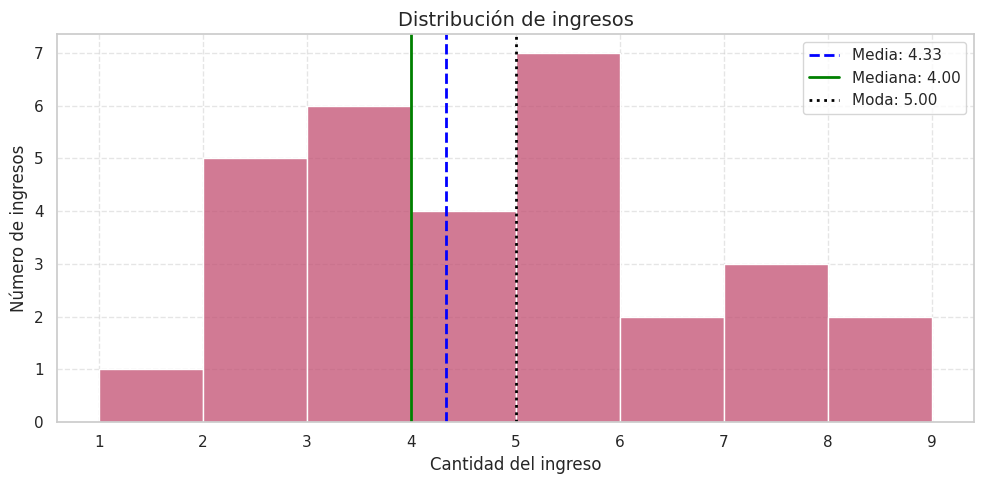

In [47]:
semilla = 89842
np.random.seed(semilla)
media_teorica = (semilla % 10) + 2

ingresos = np.random.normal(loc= media_teorica, scale= 2, size=30).round(0)
ingresos = np.clip(a=ingresos, a_min=0, a_max=None)

media= np.mean(ingresos)
mediana = np.median(ingresos)
moda = mode(ingresos, keepdims=True).mode[0]

# Visualización
plt.figure(figsize=(10, 5))
sns.histplot(ingresos, bins=8, kde=False, color="#C24E71")

# Líneas de tendencia central
plt.axvline(media, color='blue', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='black', linestyle=':', linewidth=2, label=f'Moda: {moda:.2f}')

# Estética
plt.title("Distribución de ingresos", fontsize=14)
plt.xlabel("Cantidad del ingreso", fontsize=12)
plt.ylabel("Número de ingresos", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### INTERPRETACION:
##### Los ingresos están relativamente concentrados alrededor de valores medios
##### Hay pocos casos de ingresos muy bajos o muy altos
##### La cantidad del ingreso con mayor frecuencia es de 5

### <span style="color:#2F749F;"><strong>Ejercicio 2: Cálculo de medidas de dispersión</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza qué tan dispersos están los datos respecto a su media. Calcula:
1. Rango
2. Varianza
3. Desviación estándar
4. Coeficiente de variación
5. Genera una gráfica con los resultados obtenidos (ver imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e2.png" alt="sp_2_e2" width="900"  height="400">
</p>

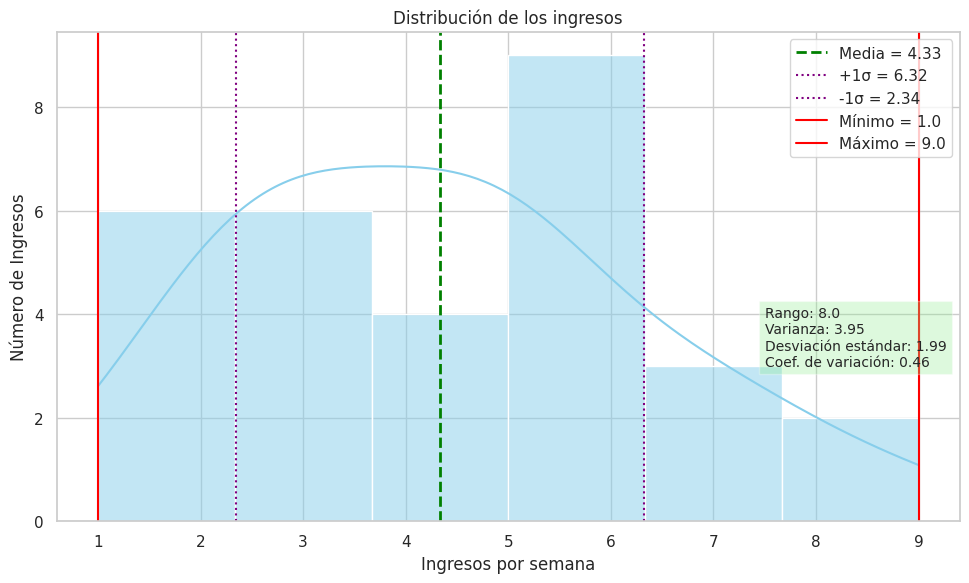

In [48]:
media = np.mean(ingresos)
minimo = np.min(ingresos)
maximo = np.max(ingresos)
rango = maximo - minimo
varianza = np.var(ingresos, ddof=1)
desviacion = np.std(ingresos, ddof=1)
coef_var = desviacion / media

# Visualización
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(ingresos, bins=6, kde=True, color='skyblue')

# Líneas verticales
plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
plt.axvline(media + desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'+1σ = {media + desviacion:.2f}')
plt.axvline(media - desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'-1σ = {media - desviacion:.2f}')
plt.axvline(minimo, color='red', linestyle='-', linewidth=1.5, label=f'Mínimo = {minimo}')
plt.axvline(maximo, color='red', linestyle='-', linewidth=1.5, label=f'Máximo = {maximo}')

# Título y etiquetas
plt.title("Distribución de los ingresos")
plt.xlabel("Ingresos por semana")
plt.ylabel("Número de Ingresos")
plt.legend()

# Recuadro con medidas
texto = (
    f"Rango: {rango}\n"
    f"Varianza: {varianza:.2f}\n"
    f"Desviación estándar: {desviacion:.2f}\n"
    f"Coef. de variación: {coef_var:.2f}"
)
plt.text(7.5, 3, texto, bbox=dict(facecolor='lightgreen', alpha=0.3), fontsize=10)

plt.tight_layout()
plt.show()

#### INTERPRETACIÓN: 
##### Ausencia de valores atípicos problemáticos
##### El coeficiente de variación del 46% indica heterogeneidad considerable en los ingresos
##### Los límites de ±1σ capturan efectivamente la concentración principal de datos

### <span style="color:#2F749F;"><strong>Ejercicio 3: Cálculo de medidas de distribución</strong></span>

A partir de la muestra generada en el Ejercicio 1, analiza la distribución de los datos. Calcula:
1. Asimetría
2. Curtosis
3. Realiza la comparación con la distribución normal (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e3.png" alt="sp_2_e3" width="900"  height="400">
</p>



Asimetría: 0.46
Curtosis: -0.46


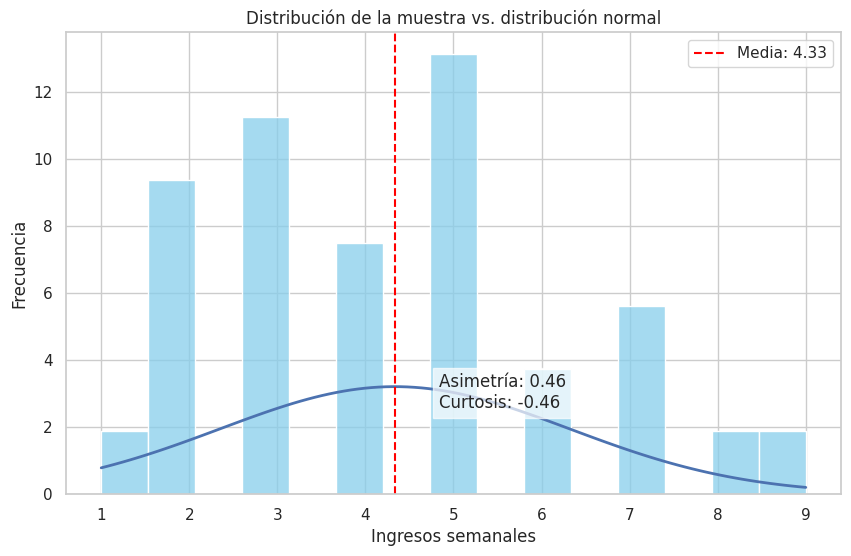

In [49]:
# Calcular asimetría y curtosis
asimetria = skew(ingresos)
curtosis_val = kurtosis(ingresos)
plt.figure(figsize=(10,6))
print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis_val:.2f}")

# Graficar histograma con la curva de distribución normal
sns.histplot(ingresos, bins=15, kde=False, stat="frequency", color="skyblue")

x = np.linspace(minimo, maximo, 100)
p = norm.pdf(x, media, desviacion) * len(ingresos) * (maximo - minimo) / 15  # escala para coincidir con histograma
plt.plot(x, p, "b", linewidth=2)

# Línea de la media
plt.axvline(media, color="red", linestyle="--", label=f"Media: {media:.2f}")

# Mostrar asimetría y curtosis en la gráfica
plt.text(media+0.5, max(p)*0.8, f"Asimetría: {asimetria:.2f}\nCurtosis: {curtosis_val:.2f}", 
         bbox=dict(facecolor="white", alpha=0.7))

plt.title("Distribución de la muestra vs. distribución normal")
plt.xlabel("Ingresos semanales")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

#### INTERPRETAICÓN
#####  Hay más personas con ingresos por debajo de la media, pero algunas con ingresos considerablemente más altos
##### Los ingresos están más distribuidos, sin una concentración extrema alrededor de la media
##### Distribución más "plana": Mayor variabilidad en los rangos medios

### <span style="color:#2F749F;"><strong>Ejercicio 4: Cálculo de medidas de percentiles</strong></span>

A partir de la muestra generada en el Ejercicio 1, calcula los percentiles de tus datos. Calcula:
1. Percentiles
2. Deciles
3. Cuartiles
4. Grafica los anteriores percentiles calculados, sobre la distribución de tus datos (ver la imagen de ejemplo)

<p align="center">
    <img src="imgs\sp_2_e4.png" alt="sp_2_e4" width="900"  height="400">
</p>


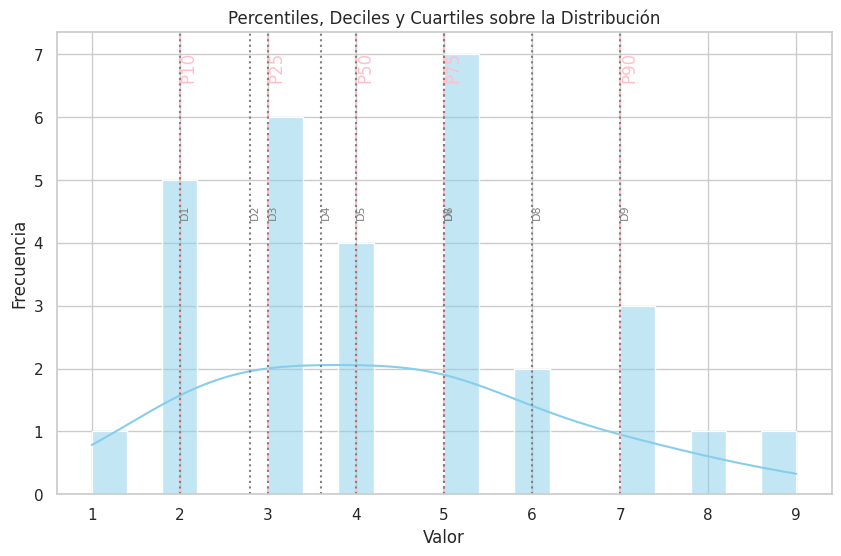

📊 Percentiles: {'P10': 2.0, 'P25': 3.0, 'P50': 4.0, 'P75': 5.0, 'P90': 7.0}
📊 Deciles: {'D1': 2.0, 'D2': 2.8000000000000007, 'D3': 3.0, 'D4': 3.6000000000000014, 'D5': 4.0, 'D6': 5.0, 'D7': 5.0, 'D8': 6.0, 'D9': 7.0}
📊 Cuartiles: {'Q1': 3.0, 'Q2': 4.0, 'Q3': 5.0}


In [50]:
# 1. Percentiles
percentiles = {
    "P10": np.percentile(ingresos, 10),
    "P25": np.percentile(ingresos, 25),  # = Q1
    "P50": np.percentile(ingresos, 50),  # = Mediana = Q2
    "P75": np.percentile(ingresos, 75),  # = Q3
    "P90": np.percentile(ingresos, 90),
}

# 2. Deciles (D1 a D9 → 10%, 20%, ..., 90%)
deciles = {f"D{i}": np.percentile(ingresos, i*10) for i in range(1, 10)}

# 3. Cuartiles
cuartiles = {
    "Q1": percentiles["P25"],
    "Q2": percentiles["P50"],
    "Q3": percentiles["P75"],
}
plt.figure(figsize=(10,6))
# 4. Graficar distribución + percentiles, deciles y cuartiles
sns.histplot(ingresos, bins=20, kde=True, color="skyblue")

# Graficar percentiles principales
for p, val in percentiles.items():
    plt.axvline(val, color="pink", linestyle="--")
    plt.text(val, plt.ylim()[1]*0.9, p, rotation=90, color="pink")

# Graficar deciles en gris
for d, val in deciles.items():
    plt.axvline(val, color="gray", linestyle=":")
    plt.text(val, plt.ylim()[1]*0.6, d, rotation=90, color="gray", fontsize=8)

plt.title("Percentiles, Deciles y Cuartiles sobre la Distribución")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

# Mostrar resultados en consola
print("📊 Percentiles:", percentiles)
print("📊 Deciles:", deciles)
print("📊 Cuartiles:", cuartiles)


#### INTERPRETAICÓN
#####  No hay concentración extrema en los valores bajos, tampoco hay una cola muy pesada en valores altos
##### La mayor concentración está en valores medios (3-6)

## <span style="color:black;"><strong>Parte 2: Análisis Bivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio 5: Análisis de correlación</strong></span>

En esta segunda parte, genera **dos variables** a partir de tú número de cédula y realiza un análisis **bivariado** para calcular la relación entre ellas.

1. Use los **6 últimos dígitos** de su cédula como base (similar al Ejercicio 1).  
2. Genere dos variables aleatorias (ejemplo: `ingresos` y `gastos`) con distribución normal, usando esa base como **semilla reproducible**.  
3. Calcule los coeficientes de correlación de **Pearson** y **Spearman**. 
4. Grafique las variables analizadas (ver la imagen de ejemplo)
5. Interprete los resultados.  

<p align="center">
    <img src="imgs\sp_2_e5.png" alt="sp_2_e5" width="900"  height="400">
</p>

Coef. Pearson = 0.833
Coef. Spearman = 0.808


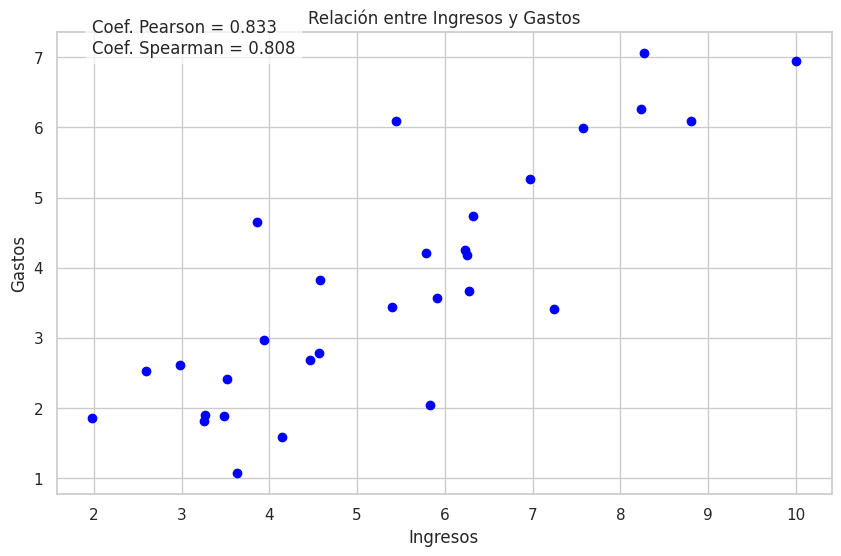

In [51]:
# Generar datos
np.random.seed(89842)
ingresos = np.random.normal(loc=5, scale=2, size=30)   # media=5, desv=2
gastos = ingresos * 0.7 + np.random.normal(loc=0, scale=1, size=30)  # correlacionados con ruido

# Calcular correlaciones
pearson_corr, _ = pearsonr(ingresos, gastos)
spearman_corr, _ = spearmanr(ingresos, gastos)

print(f"Coef. Pearson = {pearson_corr:.3f}")
print(f"Coef. Spearman = {spearman_corr:.3f}")
plt.figure(figsize=(10,6))
# 3. Graficar
plt.scatter(ingresos, gastos, color="blue")
plt.title("Relación entre Ingresos y Gastos")
plt.xlabel("Ingresos")
plt.ylabel("Gastos")

# Mostrar los coeficientes en la gráfica
plt.text(min(ingresos), max(gastos), 
         f"Coef. Pearson = {pearson_corr:.3f}\nCoef. Spearman = {spearman_corr:.3f}", 
         bbox=dict(facecolor="white", alpha=0.7))

plt.show()


#### INTERPRETAICÓN
#####  Esta es una correlación muy fuerte y significativa que confirma la relación fundamental esperada entre ingresos y gastos, con un patrón predecible y económicamente lógico.
##### La relación sugiere que el consumo aumenta con los ingresos

### <span style="color:#2F749F;"><strong>Ejercicio 6: Chi-Cuadrado</strong></span>

En esta parte, analiza si existe **asociación estadística** entre dos variables categóricas simuladas a partir de tu número de cédula.

1. Usa los **6 últimos dígitos** de tu cédula como base para generar una semilla reproducible.
2. Simula una muestra de **60 personas** con dos variables categóricas:
   - `Nivel educativo`: Básico, Medio, Superior.
   - `Acceso a internet`: Sí, No.
3. Crea una **tabla de contingencia** entre ambas variables.
4. Aplica la **prueba de Chi cuadrado de independencia**.
5. Visualiza la distribución conjunta con un mapa de calor (ver la imagen de con la información de ejemplo).
6. Interpreta el resultado.

<p align="center">
    <img src="imgs\sp_2_e6.png" alt="sp_2_e6" width="900"  height="700">
</p>

Tabla de contingencia:
 Acceso a internet  No  Sí
Nivel educativo          
Básico              7  19
Medio               5  17
Superior            1  11

Resultados de Chi-cuadrado:
Chi2 = 1.695, gl = 2, p-valor = 0.429

Frecuencias esperadas:
 [[ 5.63333333 20.36666667]
 [ 4.76666667 17.23333333]
 [ 2.6         9.4       ]]


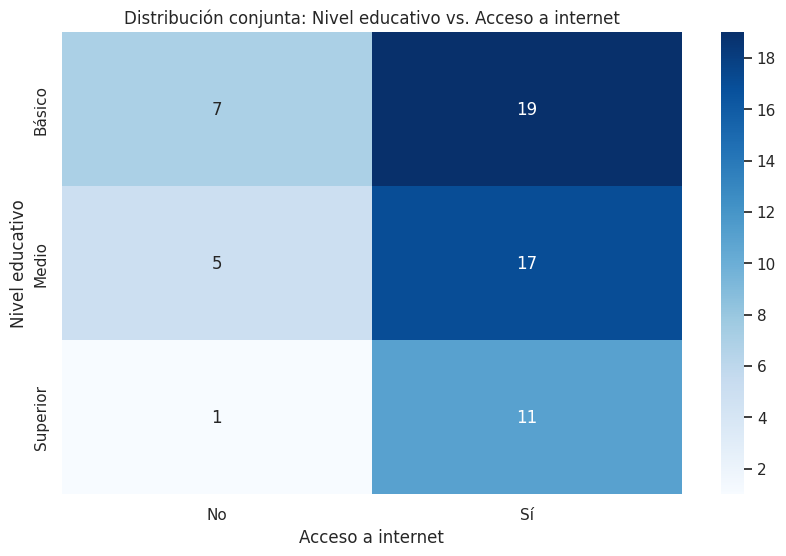

In [52]:
# 1. Simular muestra de 60 personas
np.random.seed(89842)

nivel_educativo = np.random.choice(["Básico", "Medio", "Superior"], size=60, p=[0.4, 0.35, 0.25])
acceso_internet = np.random.choice(["Sí", "No"], size=60, p=[0.7, 0.3])

df = pd.DataFrame({"Nivel educativo": nivel_educativo, "Acceso a internet": acceso_internet})

# 2. Crear tabla de contingencia
tabla = pd.crosstab(df["Nivel educativo"], df["Acceso a internet"])
print("Tabla de contingencia:\n", tabla)

# 3. Prueba Chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(tabla)
print("\nResultados de Chi-cuadrado:")
print(f"Chi2 = {chi2:.3f}, gl = {dof}, p-valor = {p:.3f}")
print("\nFrecuencias esperadas:\n", expected)

# 4. Visualización con mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt="d", cmap="Blues")
plt.title("Distribución conjunta: Nivel educativo vs. Acceso a internet")
plt.show()


#### INTERPRETAICÓN
#####  Existe un patrón ascendente en el acceso a internet conforme aumenta el nivel educativo, pero las diferencias no son lo suficientemente grandes para ser estadísticamente significativas.
##### Para confirmar una posible asociación sería recomendable: Aumentar el tamaño de la muestra , estratificar mejor los niveles educativos considerar otras variables mediadoras